In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemstone-price-prediction/cubic_zirconia.csv
/kaggle/input/gemstone-price-prediction/Data Dictionary.xlsx


Importing dataset

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [81]:
df=pd.read_csv('../input/gemstone-price-prediction/cubic_zirconia.csv')

In [82]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [83]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [85]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [86]:
df = df.drop('Unnamed: 0',axis=1)

Missing Values

In [87]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

depth 0.0258  % missing values


Numerical Variables

In [88]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779


Catagorial Coloumns

In [89]:
catagorial_features = df_f.select_dtypes(include = 'object').columns.to_list()

print('Number of catagorial variables: ', len(catagorial_features))

# visualise the catagorial variables
df[catagorial_features].head()

Number of catagorial variables:  3


,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


Drop coloumn

Handling missing values

In [90]:
df['depth'] = df['depth'].fillna(df['depth'].mean())

In [91]:
df = df[df['x'] != 0]
df = df[df['y'] != 0]
df = df[df['z'] != 0]

In [92]:
df = df.drop_duplicates()

In [93]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


REMOVING OUTLIERS

In [94]:
from scipy.stats import zscore
df_f = df.copy(deep = True)
def drop_numerical_outliers(df, z_thresh=3):
    outliers = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(zscore(x)) < z_thresh).all(axis=1)
    df.drop(df.index[~outliers], inplace=True)
    return df

df_f = drop_numerical_outliers(df_f)
df_f.shape

(25754, 10)

In [95]:
df_f.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,25754.0,0.760586,0.429722,0.20,0.39,0.70,1.02,2.22
depth,25754.0,61.745988,1.233418,57.60,61.10,61.80,62.50,65.90
table,25754.0,57.366192,2.092092,51.00,56.00,57.00,59.00,64.00
x,25754.0,5.656377,1.066162,3.73,4.68,5.65,6.50,8.54
y,25754.0,5.659880,1.059122,3.71,4.69,5.65,6.49,8.57
z,25754.0,3.493335,0.658704,1.53,2.89,3.49,4.01,5.30
price,25754.0,3598.003572,3487.768090,326.00,920.00,2269.50,5079.50,15992.00


VISUALIZATIONS

# > ******Univariate Analysis

catagorial variables

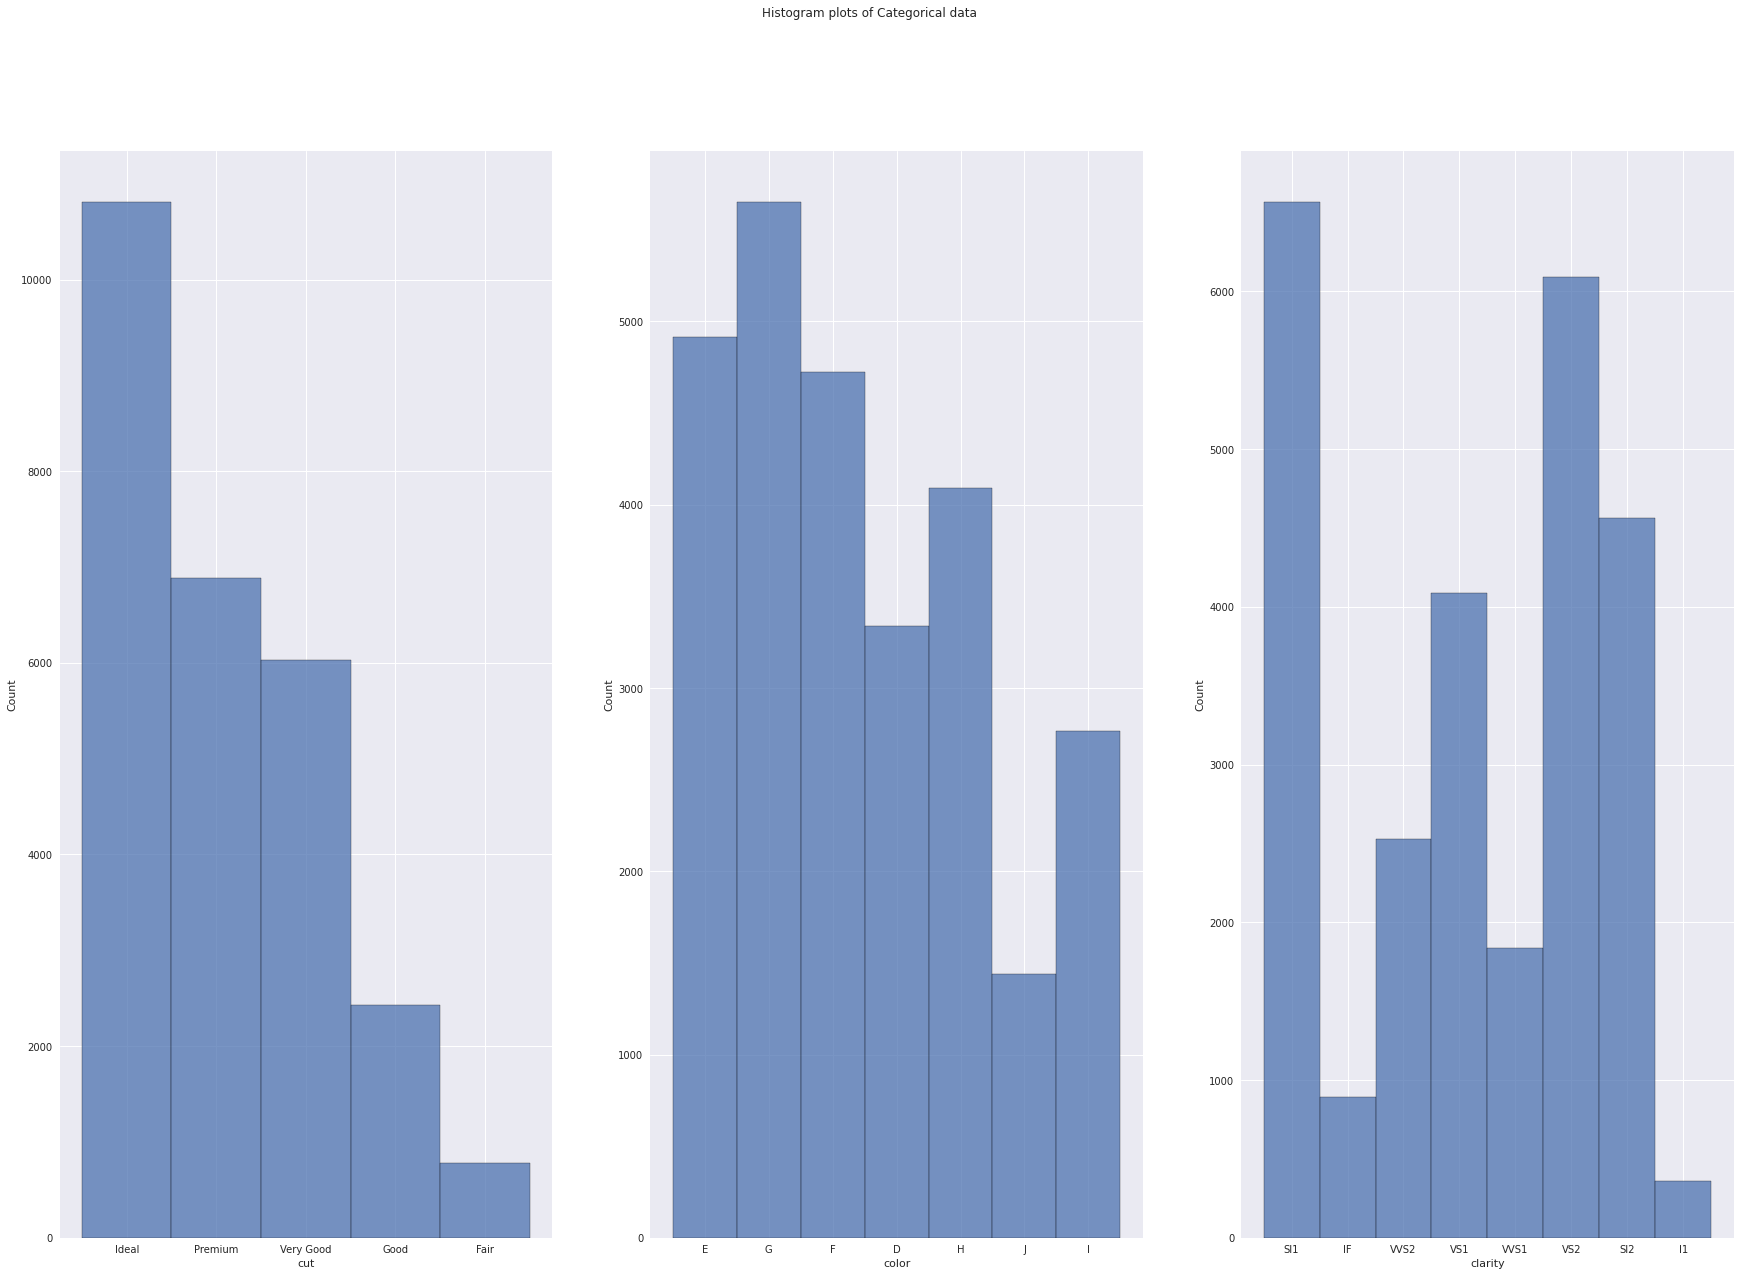

In [96]:
plt.figure(figsize = (30,20))
plt.subplot(131)
sns.histplot(data = df, x = 'cut')

plt.subplot(132)
sns.histplot(data = df, x = 'color')

plt.subplot(133)
sns.histplot(data = df, x = 'clarity')

plt.suptitle('Histogram plots of Categorical data')
plt.show()

Numerical variables

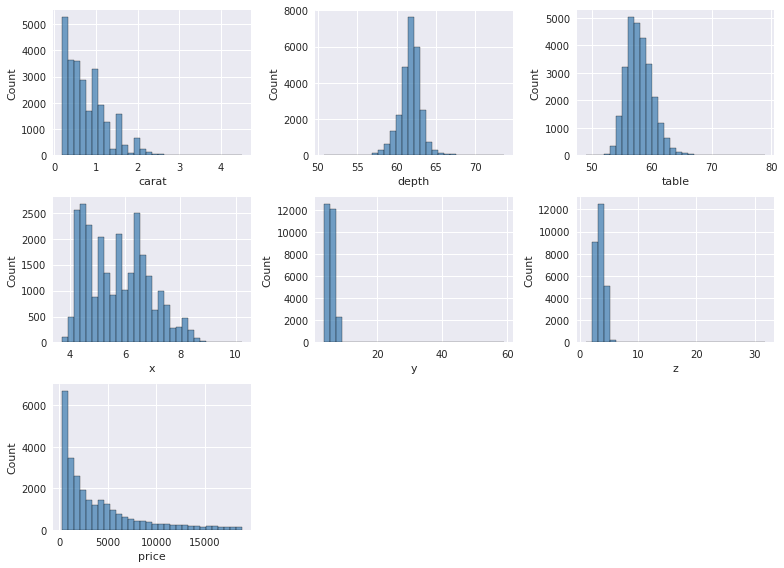

In [97]:
plt.figure(figsize = (11,8))

for i,col in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.histplot( x = col, data = df, 
                 bins = 30, color = 'steelblue')
    plt.tight_layout()

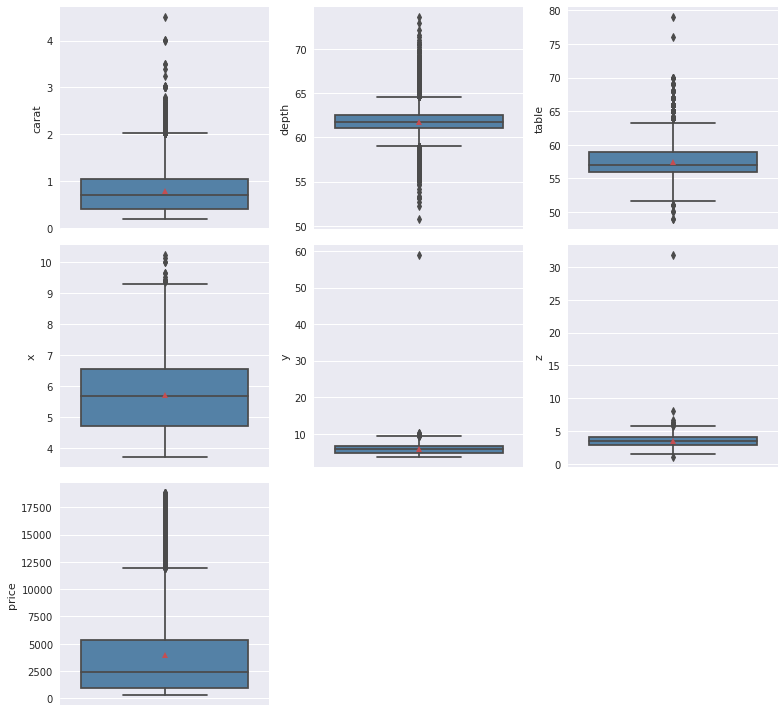

In [98]:
plt.figure(figsize = (11,10))
plt.style.use('seaborn')
for i,col in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.boxplot( y = col, data = df, 
                color = 'steelblue',
                showmeans = True)
    plt.tight_layout()

# #BIVARIATE ANALYSIS

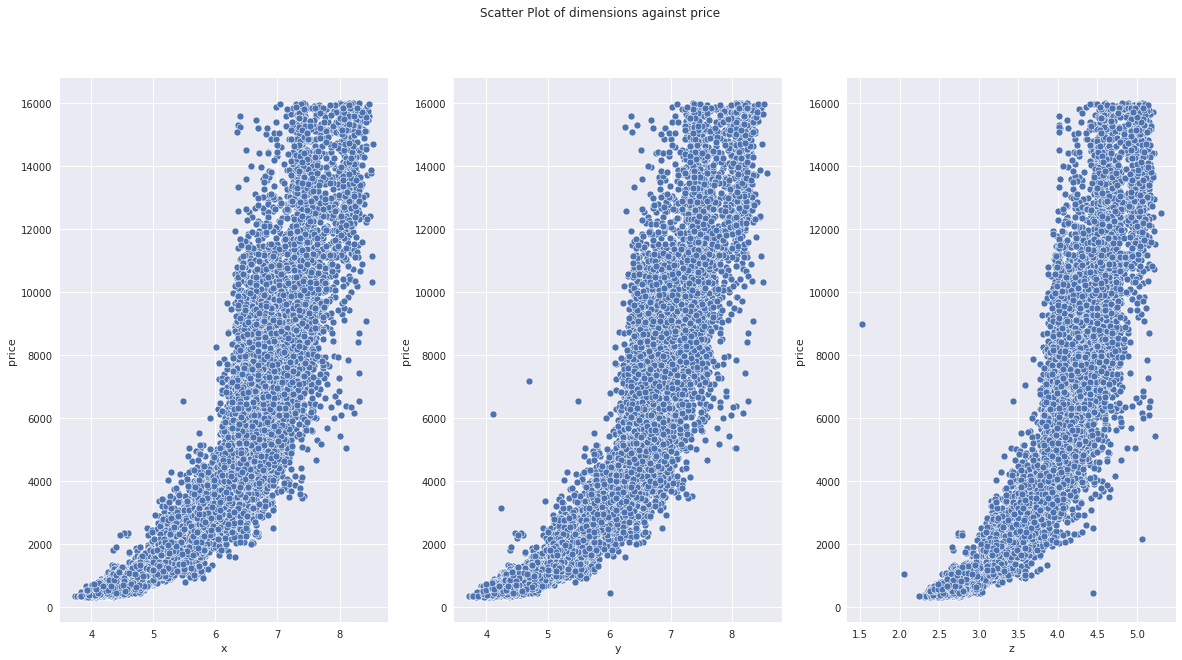

In [99]:
# Scatter plots of x, y, x against price
plt.figure(figsize = (20,10))
plt.subplot(131)
sns.scatterplot(data = df_f, x = 'x', y= 'price')

plt.subplot(132)
sns.scatterplot(data = df_f, x = 'y', y= 'price')

plt.subplot(133)
sns.scatterplot(data = df_f, x = 'z', y= 'price')

plt.suptitle('Scatter Plot of dimensions against price')
plt.show()

# MULTIVATE ANALYSIS

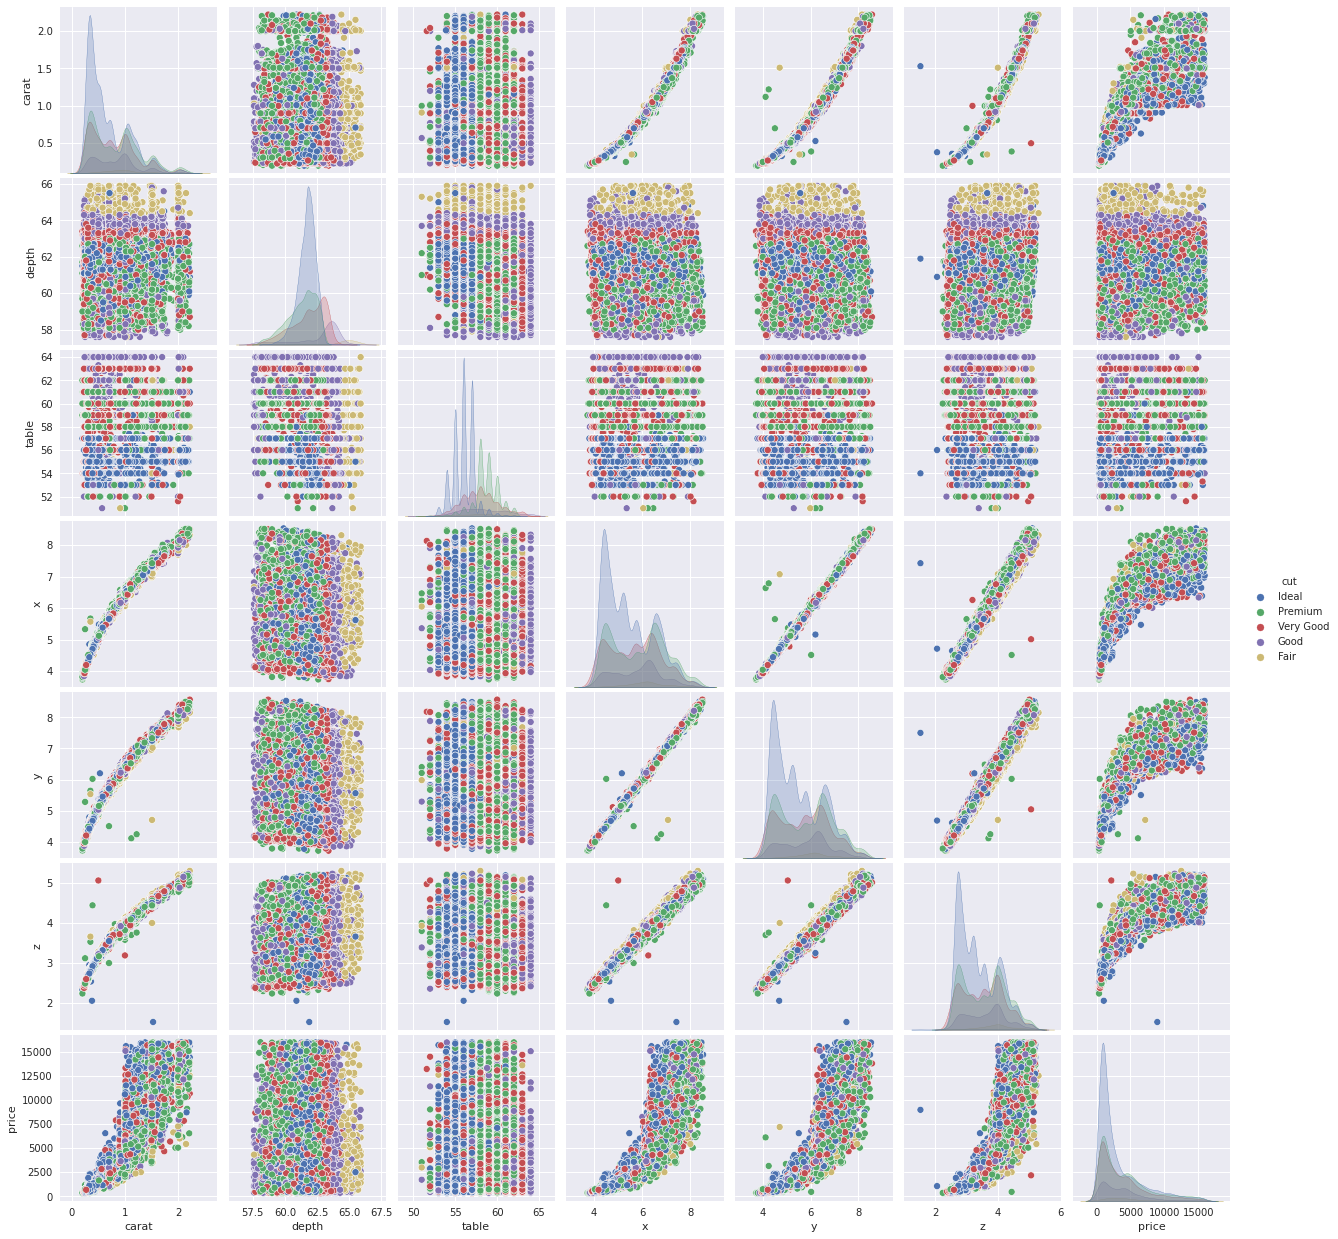

In [100]:
sns.pairplot(df_f, hue = 'cut')
plt.show()

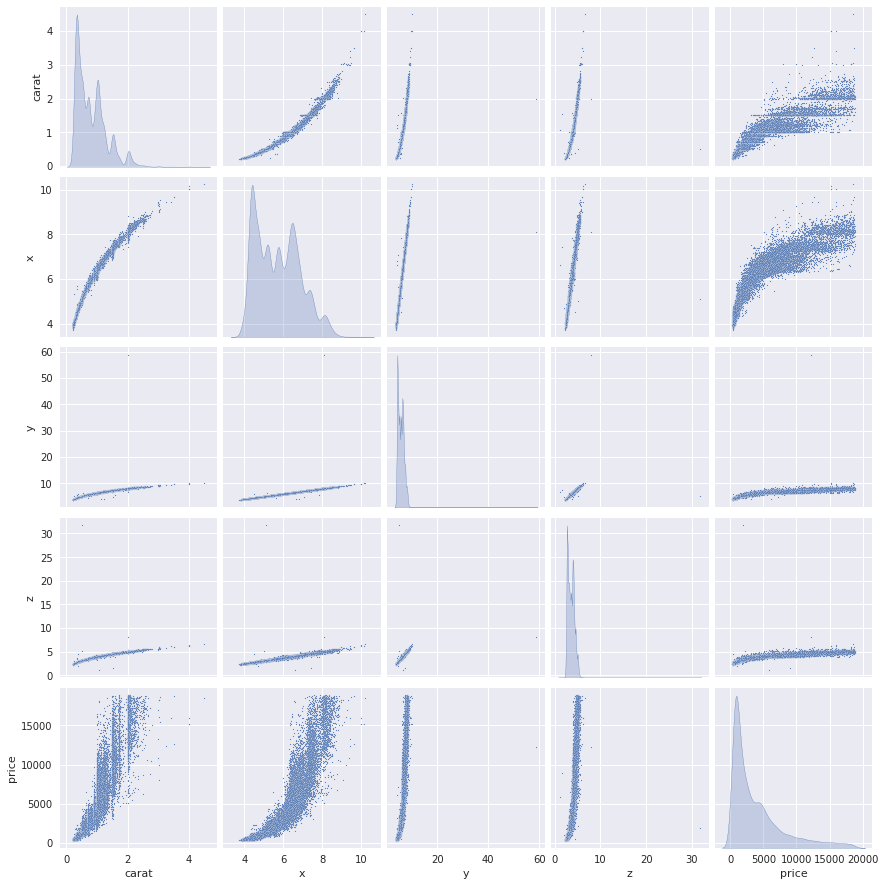

In [101]:
cols = ['carat', 'x', 'y', 'z', 'price']
df_ = df.loc[:,cols]
sns.pairplot(data =df_, diag_kind = 'kde', plot_kws = {"s": 1.5})

<AxesSubplot:>

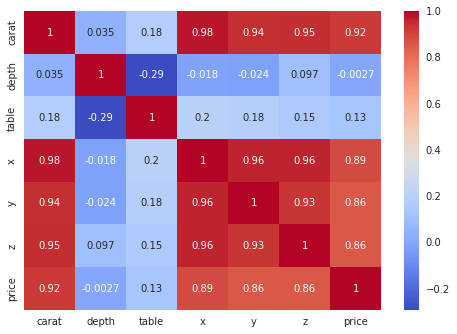

In [102]:
sns.heatmap(df.corr(), annot = True, robust = True, cmap= 'coolwarm')